In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv(r'G:\machinelearning\winequality-red.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [57]:
data.describe(),data.isna().sum()

(       fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
 count  1599.000000          1599.000000           1599.000000  1599.000000   
 mean      0.087467            15.874922             46.467792     0.996747   
 std       0.047065            10.460157             32.895324     0.001887   
 min       0.012000             1.

In [9]:
print(data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [14]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


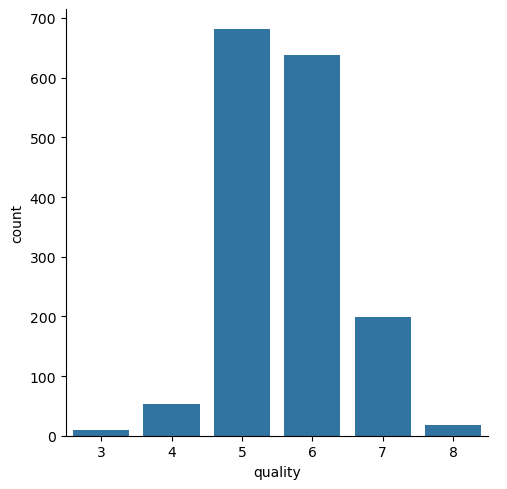

In [43]:
data['quality'].value_counts()

sns.catplot(x='quality',data=data, kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

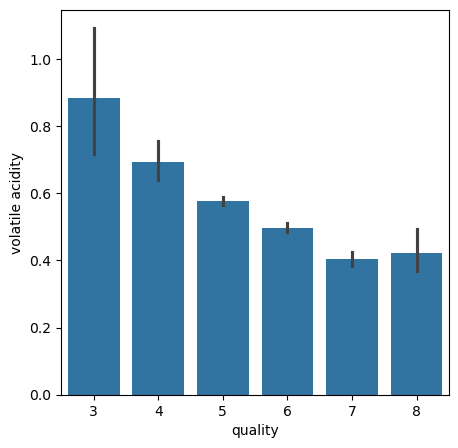

In [27]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

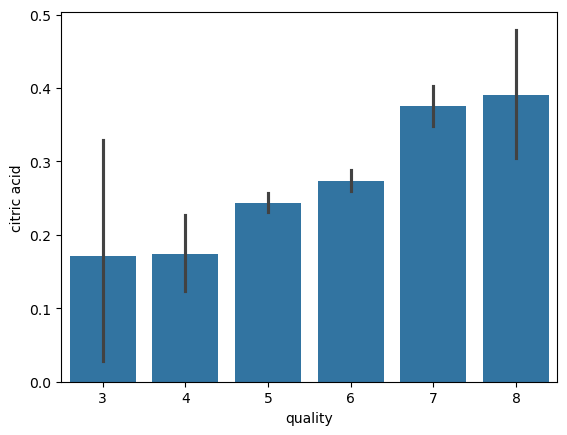

In [28]:
sns.barplot(x='quality', y='citric acid', data=data)

<Axes: xlabel='quality', ylabel='residual sugar'>

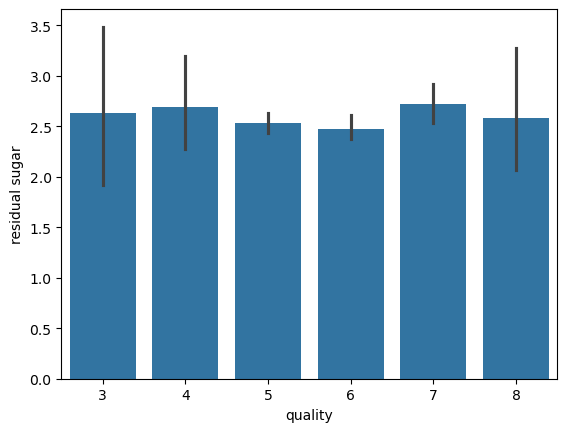

In [29]:
sns.barplot(x='quality', y='residual sugar', data=data)

<Axes: xlabel='quality', ylabel='alcohol'>

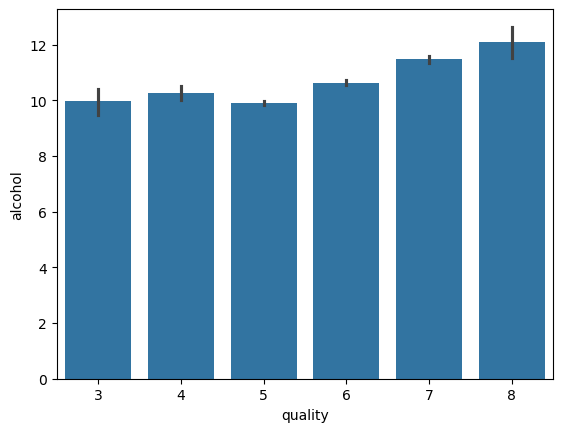

In [30]:
sns.barplot(x='quality', y='alcohol', data=data)

<Axes: xlabel='quality', ylabel='chlorides'>

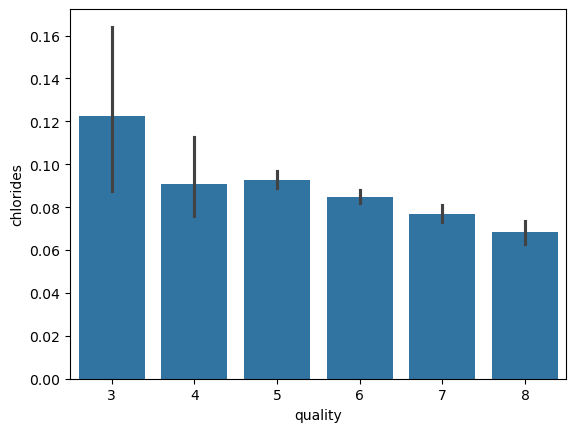

In [31]:
sns.barplot(x='quality', y='chlorides', data=data)

<Axes: xlabel='quality', ylabel='density'>

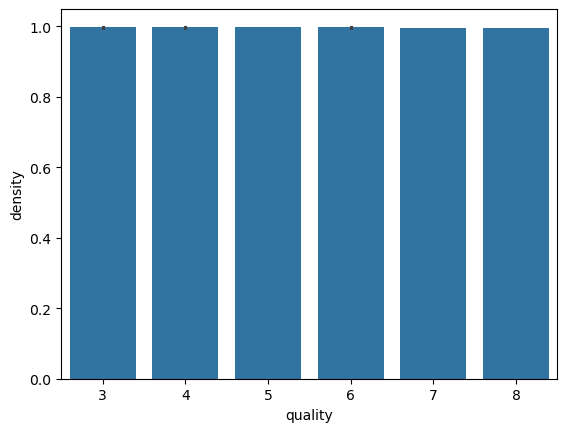

In [32]:
sns.barplot(x='quality', y='density', data=data)

In [34]:
cor=data.corr()

<Axes: >

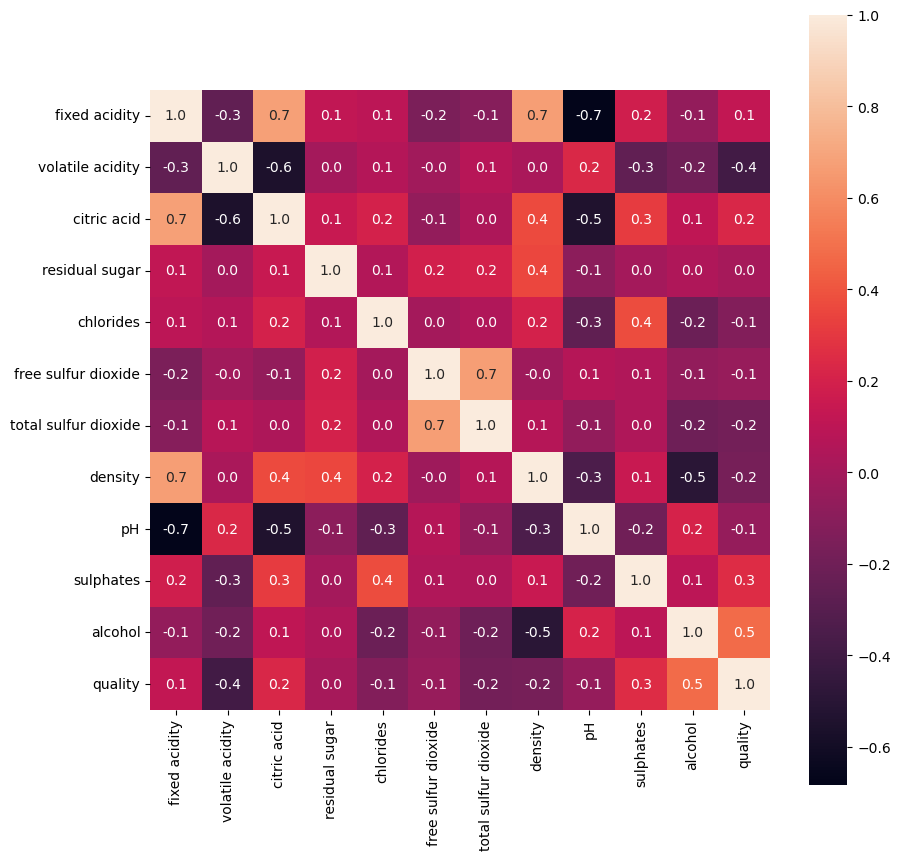

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,cbar=True,square=True,fmt='.1f',annot=True)

In [52]:
#data split
x = data.drop('quality', axis=1)
y = data['quality']

In [53]:
x.head(),y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  
 0      9.4  
 1      9.8  
 2      9.8  
 3      9.8  
 4

In [54]:
# train test
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.5,random_state=42)

In [56]:
xtr.shape,ytr.shape,xts.shape,yts.shape

((799, 11), (799,), (800, 11), (800,))

In [61]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

In [62]:
dtree.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [63]:
ypred=dtree.predict(xts)
ypred

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 6, 6, 5, 5, 5, 5, 6, 7, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 7, 6,
       7, 5, 7, 5, 6, 5, 6, 5, 7, 5, 7, 6, 7, 7, 5, 7, 5, 5, 6, 7, 5, 6,
       6, 5, 7, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5,
       7, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 7, 6, 6, 7, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 7, 5, 5, 6, 6, 6, 7, 5, 6, 7, 6, 6, 5, 5, 6, 5,
       5, 7, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 6, 5, 5, 5, 7, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 7, 6, 6, 6,
       5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 5, 6, 6, 7, 6, 5, 7, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [64]:
#accuracy
from sklearn.metrics import accuracy_score
print('model accuracy with gini criteria is:{0:0.4f}'.format(accuracy_score(yts,ypred)))

model accuracy with gini criteria is:0.5437


In [65]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(yts,ypred)
cmat

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,  21,   7,   0,   0],
       [  0,   0, 267,  84,   4,   0],
       [  0,   0, 135, 132,  35,   0],
       [  0,   0,  16,  49,  36,   0],
       [  0,   0,   0,   4,   7,   0]], dtype=int64)

<Axes: >

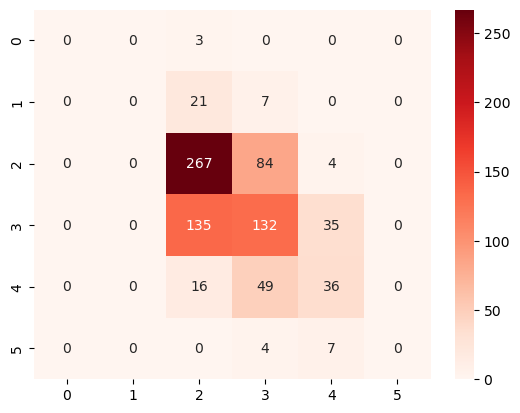

In [70]:
#display
sns.heatmap(cmat,annot=True,fmt='d',cmap='Reds')

In [71]:
#classification report
from sklearn.metrics import classification_report
cr=classification_report(yts,ypred)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        28
           5       0.60      0.75      0.67       355
           6       0.48      0.44      0.46       302
           7       0.44      0.36      0.39       101
           8       0.00      0.00      0.00        11

    accuracy                           0.54       800
   macro avg       0.25      0.26      0.25       800
weighted avg       0.50      0.54      0.52       800



C:\Users\home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.5, 0.875, 'x[10] <= 10.525\ngini = 0.641\nsamples = 799\nvalue = [7, 25, 326, 336, 98, 7]'),
 Text(0.25, 0.625, 'x[6] <= 98.5\ngini = 0.551\nsamples = 487\nvalue = [6, 18, 282, 162, 18, 1]'),
 Text(0.125, 0.375, 'x[1] <= 0.405\ngini = 0.577\nsamples = 425\nvalue = [6.0, 17.0, 224.0, 160.0, 17.0, 1.0]'),
 Text(0.0625, 0.125, 'gini = 0.596\nsamples = 83\nvalue = [0, 3, 24, 46, 9, 1]'),
 Text(0.1875, 0.125, 'gini = 0.544\nsamples = 342\nvalue = [6, 14, 200, 114, 8, 0]'),
 Text(0.375, 0.375, 'x[9] <= 1.175\ngini = 0.123\nsamples = 62\nvalue = [0, 1, 58, 2, 1, 0]'),
 Text(0.3125, 0.125, 'gini = 0.066\nsamples = 59\nvalue = [0, 1, 57, 0, 1, 0]'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 0, 1, 2, 0, 0]'),
 Text(0.75, 0.625, 'x[10] <= 11.55\ngini = 0.602\nsamples = 312\nvalue = [1, 7, 44, 174, 80, 6]'),
 Text(0.625, 0.375, 'x[9] <= 0.575\ngini = 0.556\nsamples = 189\nvalue = [1, 6, 38, 117, 26, 1]'),
 Text(0.5625, 0.125, 'gini = 0.587\nsamples = 29\nvalue = [1, 3, 1

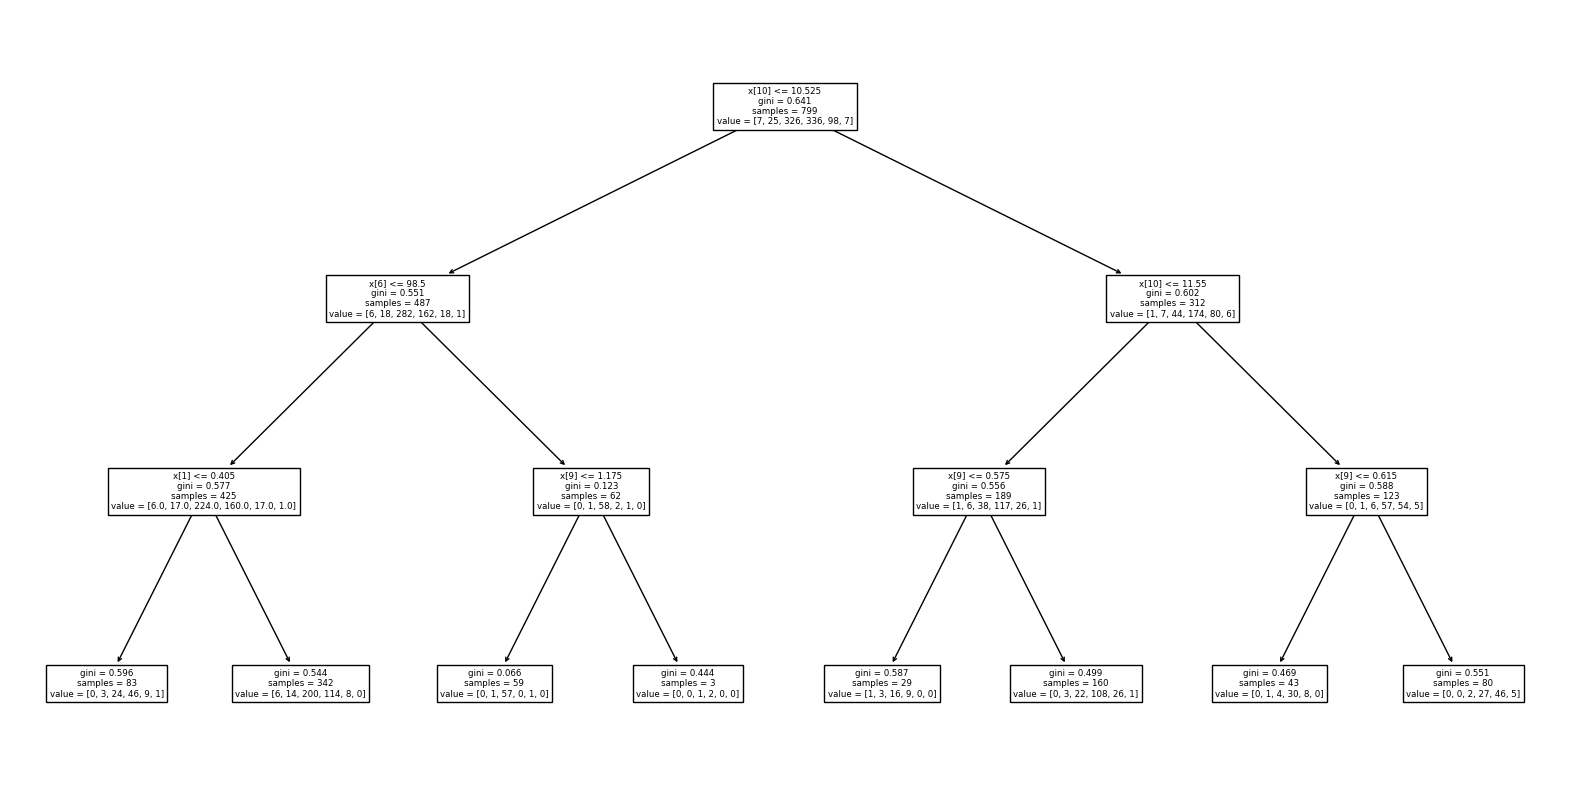

In [72]:
plt.figure(figsize=(20,10))
from sklearn import tree
tree.plot_tree(dtree.fit(xtr,ytr))